<a href="https://colab.research.google.com/github/dtabuena/Images/blob/main/Analyzing_Confocal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install python-bioformats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 40.3 MB 130 kB/s 
     |████████████████████████████████| 132 kB 37.4 MB/s 
     |████████████████████████████████| 1.3 MB 39.4 MB/s 
     |████████████████████████████████| 829 kB 63.9 MB/s 
     |████████████████████████████████| 9.2 MB 46.3 MB/s 
     |████████████████████████████████| 79 kB 7.1 MB/s 
     |████████████████████████████████| 140 kB 63.6 MB/s 
  Created wheel for python-javabridge: filename=python_javabridge-4.0.3-cp37-cp37m-linux_x86_64.whl size=1628184 sha256=abb8e108c83b55c410f394ca5d6b8587980e9714c7b7ed46e4bb069a021c39c5
  Stored in directory: /root/.cache/pip/wheels/63/7e/91/01b1bd8d29b4323834feb5cfec49b857fb212e6efc74ce103c
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=cdfc7fef0ba4307ee204c04d875e6fb78fab84a7b344f8b209f85d2f53d1637d
  Stored in directory: /root/.cache/pip/wheels/56/b0/

In [2]:
import numpy as np
import javabridge
import bioformats
import skimage
from skimage import filters
from matplotlib import pyplot as plt
import matplotlib
javabridge.start_vm(class_path=bioformats.JARS)

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [3]:
# !wget -O 'image.oir' 'https://www.dropbox.com/s/ec4squfg12j7tm7/RNF182_08-12-22_S001_CA3_40X_2XZOOM_1_.oir?dl=0'
# !wget -O 'image.oir' 'https://www.dropbox.com/s/8yiynglvcfww3cd/RNF182_08-12-22_S001_CA3_40X_2XZOOM_2.oir?dl=0'
!wget -O 'image.oir' 'https://www.dropbox.com/s/ie3v5wdhbahaigj/Nell2_08-04-22_S001_DG_40X_2XZOOM_1.oir?dl=0'
# !wget -O 'image.oir' 'https://www.dropbox.com/s/tf88caoqox1z765/Nell2_08-04-22_S001_CA3_40X_2XZOOM_7.oir?dl=0'
# !wget -O 'image.oir' 'https://www.dropbox.com/s/0597gxdoqco3aw6/MDGA2_08-25-22_S001_CA3_40X_2XZOOM_2.oir?dl=0'

--2022-09-26 21:38:44--  https://www.dropbox.com/s/ie3v5wdhbahaigj/Nell2_08-04-22_S001_DG_40X_2XZOOM_1.oir?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/ie3v5wdhbahaigj/Nell2_08-04-22_S001_DG_40X_2XZOOM_1.oir [following]
--2022-09-26 21:38:44--  https://www.dropbox.com/s/raw/ie3v5wdhbahaigj/Nell2_08-04-22_S001_DG_40X_2XZOOM_1.oir
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce4996bc0620d2d464323cb0bac.dl.dropboxusercontent.com/cd/0/inline/Btv_LioD7ykM7EHG4DNq1fRu9qmTc2bHHi6RyHP82cWdFg8MGP_aDslhLWO9uYmHO4jFVkj6BYaoVAN5I4zlI5jALua8oDzFNTdaivUqQPQHZq6eGgKijUQsdkd7AnhDxvs5zJwMmU13L7KlKsJps3g_j0cwNiYdFsPobboyh-fHuQ/file# [following]
--2022-09-26 21:38:45--  https://uce4996bc0620d2d464323cb0bac.dl.dropboxusercontent.com/cd/0/i

In [4]:
my_reader = bioformats.get_image_reader('my_image', 'image.oir')

c_dim = my_reader.rdr.getSizeC()
z_dim = my_reader.rdr.getSizeZ()
x_dim = my_reader.rdr.getSizeX()
y_dim = my_reader.rdr.getSizeY()
print(x_dim,y_dim,c_dim,z_dim)

image = np.empty([x_dim,y_dim,c_dim,z_dim])
for zi in range(z_dim):
    img_zi = my_reader.read(c=None, z=zi,rescale=True)
    image[:,:,:,zi] = img_zi


image_zproj = np.max(image,axis=3)
# image = np.expand_dims(image_zproj, axis=-1)
print(image.shape)
for ci in range(image.shape[2]):
    cim = image[:,:,ci,:]
    flat = cim.flatten()
    max= np.percentile(flat,100)
    assert max>0 , print(flat)
    cim = cim/max
    image[:,:,ci,:] = cim

800 800 3 8
(800, 800, 3, 8)


In [11]:
def new_colormap(start,stop,n=256):
    start = np.array(start)
    stop = np.array(stop)
    delta_ni = np.expand_dims((stop-start)/n,-1)
    ni = np.expand_dims(np.arange(n),-1)
    cmap_np = start + np.multiply(delta_ni.T,ni)
    return matplotlib.colors.ListedColormap(cmap_np)


green_map = new_colormap([0,0,0,1],[0,1,0,1])
red_map = new_colormap([0,0,0,1],[1,0,0,1])
white_map = new_colormap([0,0,0,1],[1,1,1,1])
blue_map = new_colormap([0,0,0,1],[0,0,1,1])

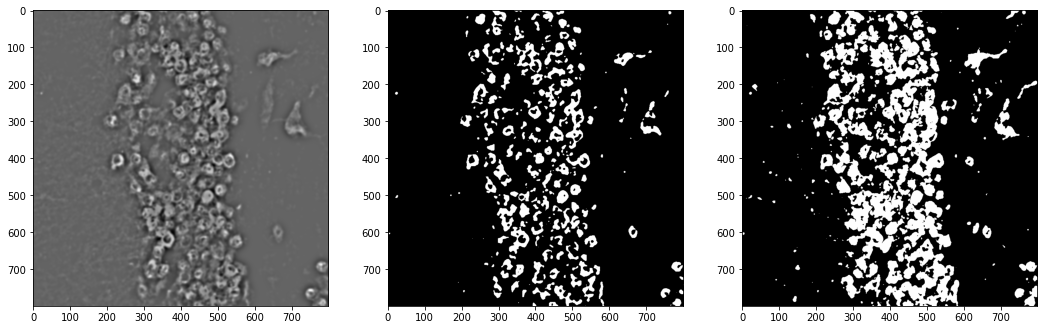

In [15]:
####################### Process NEUN
neun_im = image[:,:,2,:]
m_size = 5
g_sigma_1 = 2
g_sigma_2 = 10
im_filtered = neun_im.copy()
for zi in range(neun_im.shape[-1]):
    im_zi = neun_im[:,:,zi]
    im_zi_mf = skimage.filters.median(im_zi, selem=np.ones([m_size,m_size]))   #### DeSpeckle
    im_zi_gf = ciim_F = skimage.filters.gaussian(im_zi_mf, sigma = g_sigma_1)   #### blur
    im_zi_bk = ciim_F = skimage.filters.gaussian(im_zi_gf, sigma = g_sigma_2)  ### get background from big blur
    im_zi_bs = im_zi_gf - im_zi_bk
    im_filtered[:,:,zi] = im_zi_bs


neun_im = im_filtered
neun_vals = neun_im.flatten()
neu_thresh = filters.threshold_otsu(neun_vals)
neu_mask_3d = neun_im>neu_thresh
neu_mask_zp = np.max(neu_mask_3d,axis=-1)


zi=4
fig,ax = plt.subplots(1,3,figsize=[18,6])
ax[0].imshow(neun_im[:,:,zi],cmap=white_map)
ax[1].imshow(neu_mask_3d[:,:,zi],cmap=white_map)
ax[2].imshow(neu_mask_zp,cmap=white_map)


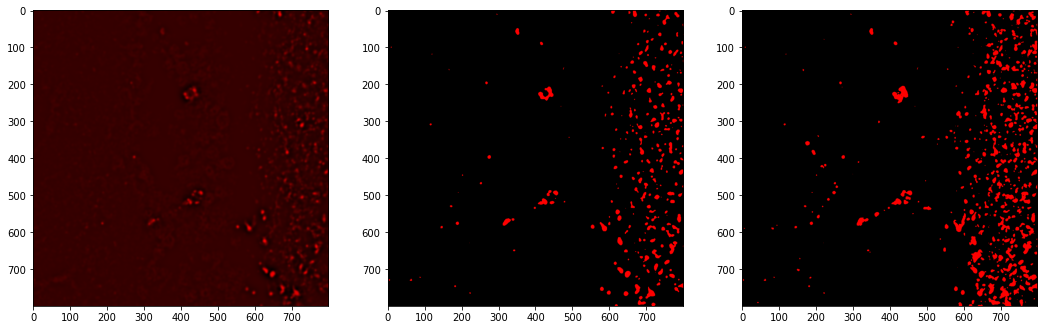

In [16]:
####################### Process mcherry
mcherry_im = image[:,:,1,:]
m_size = 5
g_sigma_1 = 2
g_sigma_2 = 10
im_filtered = mcherry_im.copy()
for zi in range(neun_im.shape[-1]):
    im_zi = mcherry_im[:,:,zi]
    im_zi_mf = skimage.filters.median(im_zi, selem=np.ones([m_size,m_size]))   #### DeSpeckle
    im_zi_gf = ciim_F = skimage.filters.gaussian(im_zi_mf, sigma = g_sigma_1)   #### blur
    im_zi_bk = ciim_F = skimage.filters.gaussian(im_zi_gf, sigma = g_sigma_2)  ### get background from big blur
    im_zi_bs = im_zi_gf - im_zi_bk
    im_filtered[:,:,zi] = im_zi_bs


mcherry_im = im_filtered
mcherry_vals = mcherry_im.flatten()
mcherry_thresh = filters.threshold_otsu(mcherry_vals)
mcherry_mask_3d = mcherry_im>neu_thresh

mcherry_mask_zp = np.max(mcherry_mask_3d,axis=-1)
zi = 5
fig,ax = plt.subplots(1,3,figsize=[18,6])
ax[0].imshow(mcherry_im[:,:,zi],cmap=red_map)
ax[1].imshow(mcherry_mask_3d[:,:,zi],cmap=red_map)
ax[2].imshow(mcherry_mask_zp,cmap=red_map)

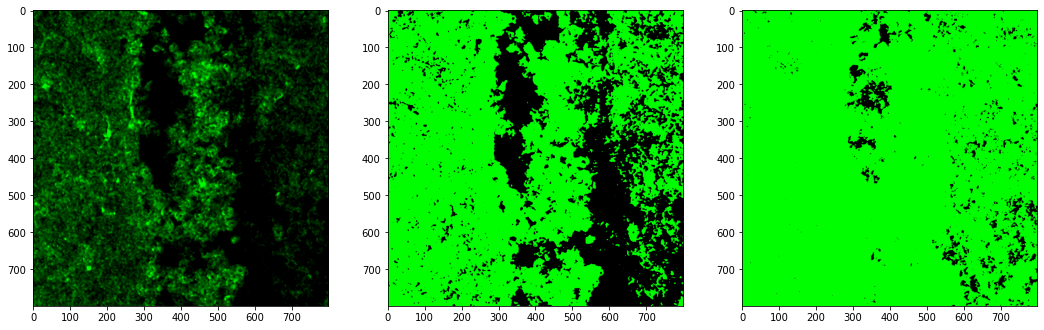

In [29]:
####################### Process CrispTarg
target_im = image[:,:,0,:]
m_size = 5
g_sigma_1 = 2
g_sigma_2 = 10
im_filtered = target_im.copy()
for zi in range(target_im.shape[-1]):
    im_zi = target_im[:,:,zi]
    im_zi_mf = skimage.filters.median(im_zi, selem=np.ones([m_size,m_size]))   #### DeSpeckle
    # im_zi_gf = ciim_F = skimage.filters.gaussian(im_zi_mf, sigma = g_sigma_1)   #### blur
    # im_zi_bk = ciim_F = skimage.filters.gaussian(im_zi_gf, sigma = g_sigma_2)  ### get background from big blur
    # im_zi_bs = im_zi_gf - im_zi_bk
    # # im_zi_bs = im_zi_bs - np.min(im_zi_bs.flatten())
    im_filtered[:,:,zi] = im_zi_mf


target_im = im_filtered
target_vals = target_im.flatten()
target_thresh = filters.threshold_otsu(target_vals)
target_mask_3d = target_im>neu_thresh

target_mask_zp = np.max(target_mask_3d,axis=-1)
zi = 5
fig,ax = plt.subplots(1,3,figsize=[18,6])
ax[0].imshow(target_im[:,:,zi],cmap=green_map)
ax[1].imshow(target_mask_3d[:,:,zi],cmap=green_map)
ax[2].imshow(target_mask_zp,cmap=green_map)

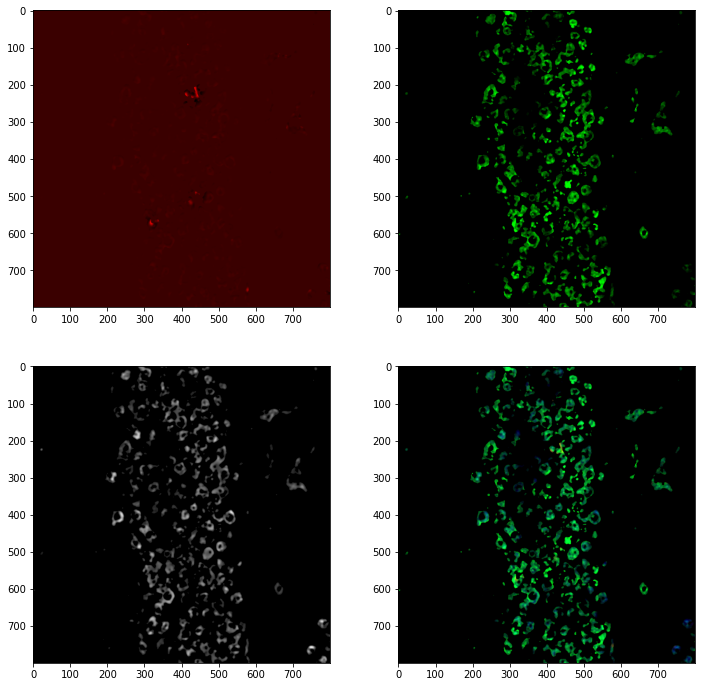

In [32]:
fig,ax = plt.subplots(2,2,figsize=[12,12])
ax = ax.flatten()

# neu_mask_zp_3 = np.expand_dims(neu_mask,-1)
neuronal_mcherry = neu_mask_3d* mcherry_im
neuronal_target = neu_mask_3d*target_im
neuronal_neun = neu_mask_3d*neun_im


composite = np.stack([neuronal_mcherry,neuronal_target,neuronal_neun],axis=-2)*1.0

zi =  4
ax[0].imshow(composite[:,:,0,zi],cmap=red_map)
ax[1].imshow(composite[:,:,1,zi],cmap=green_map)
ax[2].imshow(composite[:,:,2,zi],cmap=white_map)
ax[3].imshow(composite[:,:,:,zi])
plt.show()

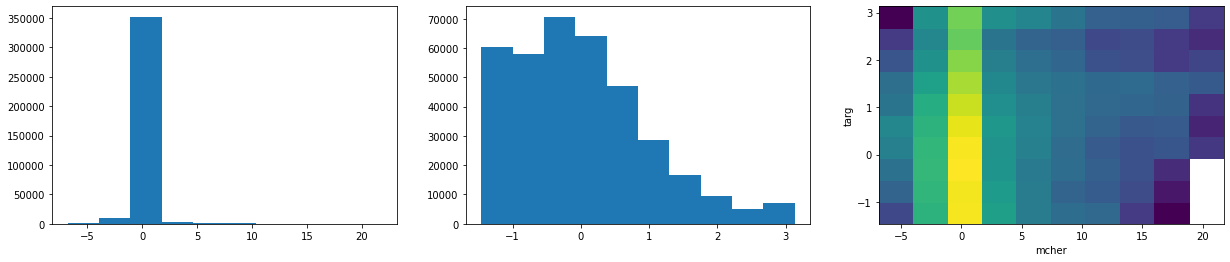

In [38]:
import matplotlib as mpl

is_neuron = neu_mask_3d.flatten()>0
neuronal_mcherry_vals = mcherry_im.flatten()[is_neuron]
neuronal_target_vals = target_im.flatten()[is_neuron]
neuronal_mcherry_vals = (neuronal_mcherry_vals-np.mean(neuronal_mcherry_vals))/np.std(neuronal_mcherry_vals)
neuronal_target_vals = (neuronal_target_vals-np.mean(neuronal_target_vals))/np.std(neuronal_target_vals)
fig, ax = plt.subplots(1,3,figsize=[21,4])
ax[0].hist(neuronal_mcherry_vals)
ax[1].hist(neuronal_target_vals)
ax[2].hist2d(neuronal_mcherry_vals,neuronal_target_vals,norm=mpl.colors.LogNorm())
ax[2].set_xlabel('mcher')
ax[2].set_ylabel('targ')
plt.show()


In [ ]:
### threhold neun
zi = 0
zero_log = 1



image_c2 = image[:,:,2,:]

c2_vals = image_c2.flatten()
neu_thresh = filters.threshold_otsu(c2_vals)
neu_mask = image_c2>neu_thresh
neu_mask_b = filters.gaussian(neu_mask,.1)>0.8

fig,ax = plt.subplots(1,3,figsize=[18,6])
ax[0].imshow(image_c2[:,:,zi],cmap=blue_map)
ax[1].imshow(neu_mask[:,:,zi],cmap=blue_map)
ax[2].imshow(neu_mask_b[:,:,zi],cmap=blue_map)

# ax[0].grid(color='w', linestyle='-', linewidth=2)
# ax[1].grid(color='w', linestyle='-', linewidth=2)
# ax[2].grid(color='w', linestyle='-', linewidth=2)

plt.show()

############## Red Mask
image_c1 = image[:,:,1,:]
# image_c1 = filters.gaussian(image_c1,2)
c1_vals = image_c1.flatten()
mcher_thresh = filters.threshold_otsu(np.log(c1_vals+zero_log))
mcher_mask = image_c1>(filters.threshold_otsu(c1_vals))
# mcher_mask = np.log(image_c1+zero_log)>mcher_thresh*1
mcher_mask_b = filters.gaussian(mcher_mask,2)>0.8

fig,ax = plt.subplots(1,3,figsize=[18,6])
ax[0].imshow(image_c1[:,:,zi],cmap=red_map)
ax[1].imshow(mcher_mask[:,:,zi],cmap=red_map)
ax[2].imshow(mcher_mask_b[:,:,zi],cmap=red_map)

# ax[0].grid(color='w', linestyle='-', linewidth=2)
# ax[1].grid(color='w', linestyle='-', linewidth=2)
# ax[2].grid(color='w', linestyle='-', linewidth=2)

plt.show()

############## green Mask
image_c0 = image[:,:,0,:]
# image_c0 = filters.gaussian(image_c0,0)
c0_vals = image_c0.flatten()
# crisp_thresh = filters.threshold_otsu(np.log(c0_vals+zero_log))
crisp_mask = image_c0>(filters.threshold_otsu(c0_vals)*1)
# crisp_mask = np.log(image_c0+zero_log)>crisp_thresh*1
crisp_mask_b = filters.gaussian(crisp_mask,.4)>.99

fig,ax = plt.subplots(1,3,figsize=[18,6])
ax[0].imshow(image_c0[:,:,zi],cmap=green_map)
ax[1].imshow(crisp_mask[:,:,zi],cmap=green_map)
ax[2].imshow(crisp_mask_b[:,:,zi],cmap=green_map)

# ax[0].grid(color='w', linestyle='-', linewidth=2)
# ax[1].grid(color='w', linestyle='-', linewidth=2)
# ax[2].grid(color='w', linestyle='-', linewidth=2)
plt.show()

In [ ]:
fig,ax = plt.subplots(2,2,figsize=[18,18])
ax = ax.flatten()
red_chan = mcher_mask_b*image[:,:,1]
red_chan = red_chan/np.max(red_chan.flatten())*neu_mask_b
green_chan = crisp_mask_b*image[:,:,0]
green_chan = green_chan/np.max(green_chan.flatten())*neu_mask_b
blue_chan = neu_mask_b*image[:,:,2]
blue_chan = blue_chan/np.max(blue_chan.flatten())*1
zi = 0
composite = np.stack([red_chan,green_chan,blue_chan],axis=-2)*1.0


ax[0].imshow(red_chan[:,:,zi],cmap=red_map)
ax[1].imshow(green_chan[:,:,zi],cmap=green_map)
ax[2].imshow(blue_chan[:,:,zi],cmap=blue_map)
ax[3].imshow(composite[:,:,:,zi])
plt.show()

In [ ]:
# alexa-488
# 594
# 647

In [ ]:
neu_mask_flat = neu_mask_b.flatten()
red_vals = red_chan.flatten()
green_vals = green_chan.flatten()

red_pix_in_cell = red_vals[neu_mask_flat]
green_pix_in_cell = green_vals[neu_mask_flat]

rpos_gpos = np.logical_and(red_pix_in_cell,green_pix_in_cell)
rpos_gneg = np.logical_and(red_pix_in_cell,np.logical_not(green_pix_in_cell))
rneg_gpos = np.logical_and(np.logical_not(red_pix_in_cell),green_pix_in_cell)
rneg_gneg = np.logical_and(np.logical_not(red_pix_in_cell),np.logical_not(green_pix_in_cell))


# rpos_gpos_count = np.sum(rpos_gpos)
# rpos_gneg_count = np.sum(rpos_gneg)
# rneg_gpos_count = np.sum(rneg_gpos)
# rneg_gneg_count = np.sum(rneg_gneg)



print('rpos_gpos',np.sum(rpos_gpos) )
print('rpos_gneg',np.sum(rpos_gneg) )
print('rneg_gpos',np.sum(rneg_gpos) )
print('rneg_gneg',np.sum(rneg_gneg) )
print('')

print('P(G+|R+) ',  np.round(np.sum(rpos_gpos) /(np.sum(rpos_gneg)+np.sum(rpos_gpos)) *100,1)  )
print('P(G-|R+) ',  np.round(np.sum(rpos_gneg) /(np.sum(rpos_gneg)+np.sum(rpos_gpos)) *100,1)  )

print('P(G+|R-) ',  np.round(np.sum(rneg_gpos) /(np.sum(rneg_gneg)+np.sum(rneg_gpos)) *100,1)  )
print('P(G-|R-) ',  np.round(np.sum(rneg_gneg) /(np.sum(rneg_gneg)+np.sum(rneg_gpos)) *100,1)  )
print('')

# print('P(G+) ', np.round(np.mean(green_pix_in_cell)*100,1))
# print('P(G-) ',  np.round(100-np.mean(green_pix_in_cell)*100,1))
# print('P(R+) ',  np.round(np.mean(red_pix_in_cell)*100,1))
# print('P(R-) ',  np.round(100-np.mean(red_pix_in_cell)*100,1))


# import scipy
# table = [[np.sum(rpos_gneg),np.sum(rpos_gpos)],[np.sum(rneg_gneg),np.sum(rneg_gpos)] ]
# odds_ratio, p_val = scipy.stats.fisher_exact(table, alternative='two-sided')
# print('p=',p_val)